In [ ]:
## Cargamos nuestras librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [ ]:
## Cargamos nuestros datos 
data = pd.read_csv('/content/whr2017.csv')

In [ ]:
data.head()

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [ ]:
data.describe()

,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [ ]:
data.isna().sum()

country       0
rank          0
score         0
high          0
low           0
gdp           0
family        0
lifexp        0
freedom       0
generosity    0
corruption    0
dystopia      0
dtype: int64

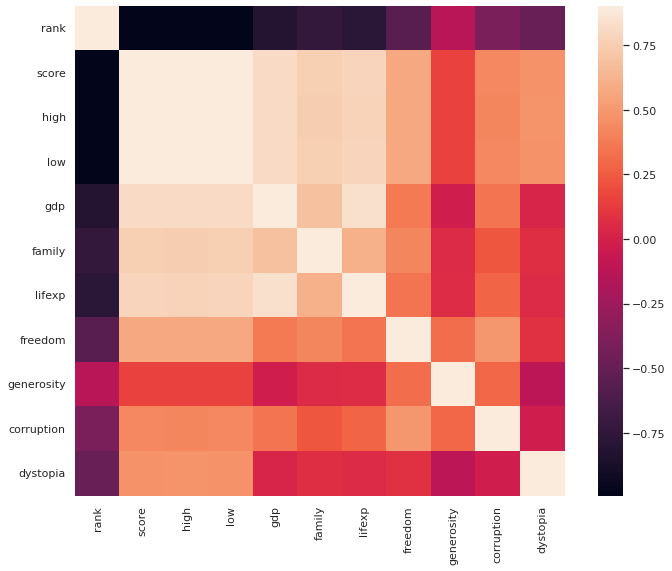

In [ ]:
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: ignored

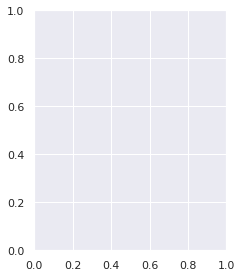

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [ ]:
X1 = data.drop(columns = 'country', axis = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

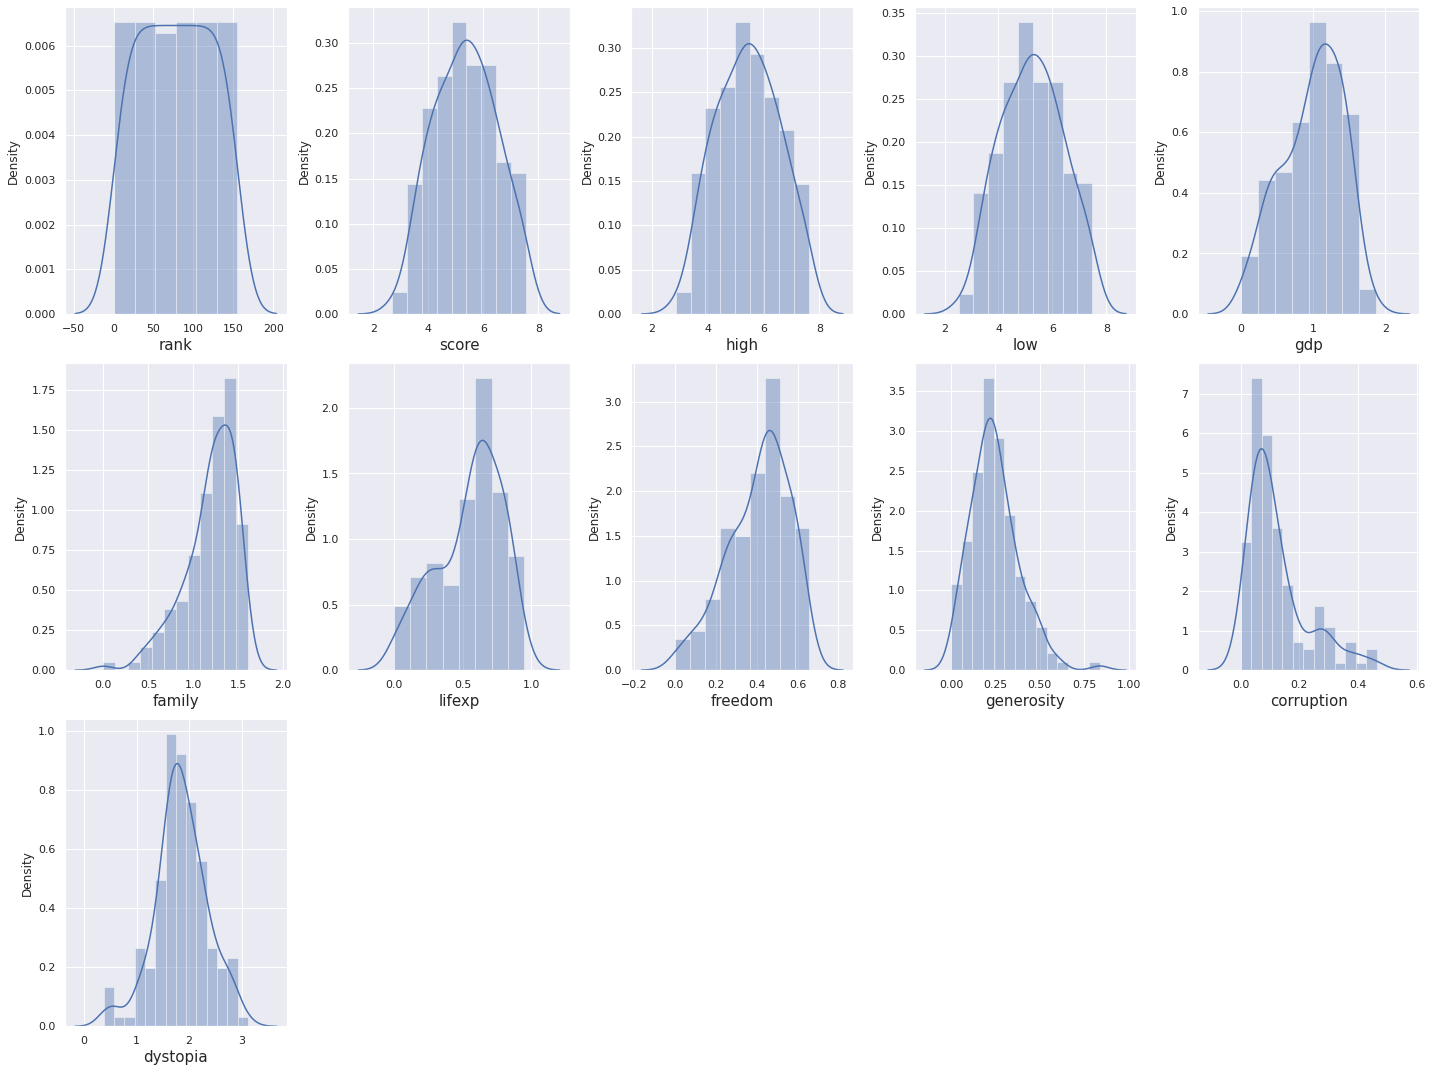

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in X1:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(X1[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

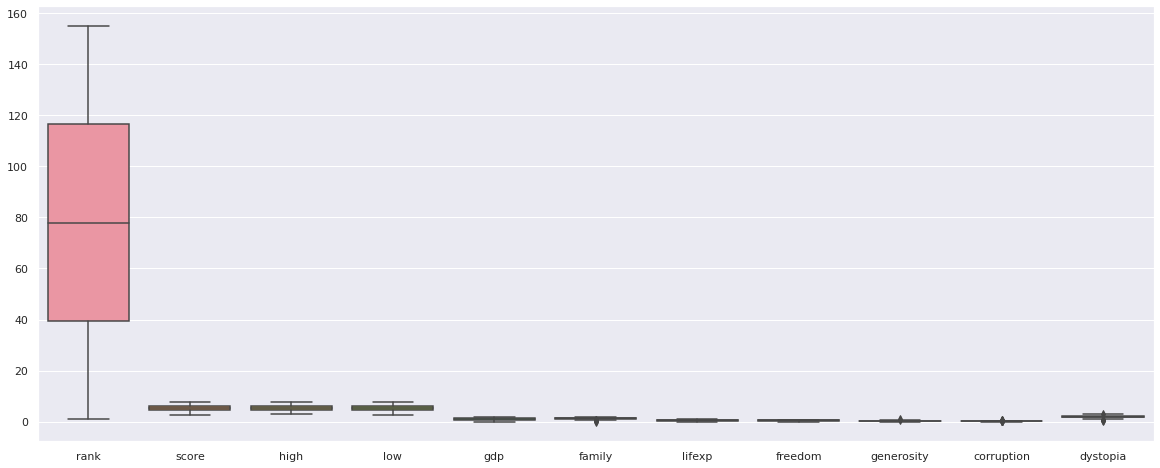

In [ ]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = X1, width = 0.8)
plt.show()

In [ ]:
y = data[['score']]
X = data[['gdp', 'family', 'lifexp', 'freedom' , 'corruption' , 'generosity', 'dystopia']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

In [ ]:
X_scaled

array([[-1.7209121 ,  1.93599602,  1.92130768, ...,  0.8569643 ,
         1.90308438,  0.85629599],
       [-1.69856259,  1.92269283,  1.90990177, ...,  0.80685634,
         2.73999784,  0.92989102],
       [-1.67621309,  1.90672969,  1.94604978, ...,  1.70201314,
         0.30006608,  0.94796425],
       ...,
       [ 1.67621309, -1.77816933, -1.78567274, ...,  0.79923322,
        -0.56334657, -2.4660431 ],
       [ 1.69856259, -2.17193469, -2.13254674, ..., -0.31596505,
        -0.38459935, -0.33549229],
       [ 1.7209121 , -2.35994869, -2.32072582, ...,  0.25302799,
        -0.65680192,  0.43290816]])

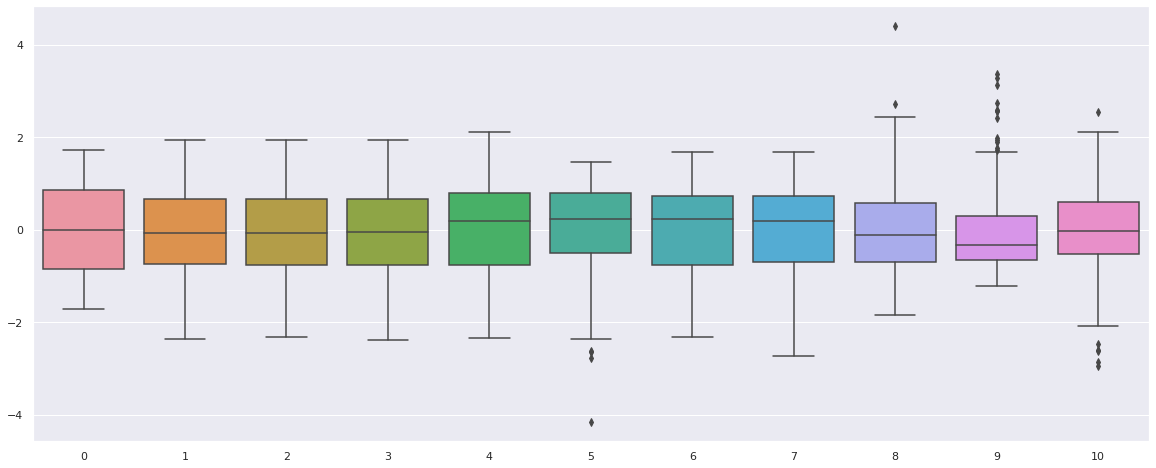

In [ ]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = X_scaled, width = 0.8)
plt.show()

In [ ]:
  print(X.shape)
  print(y.shape)

(155, 7)
(155, 1)


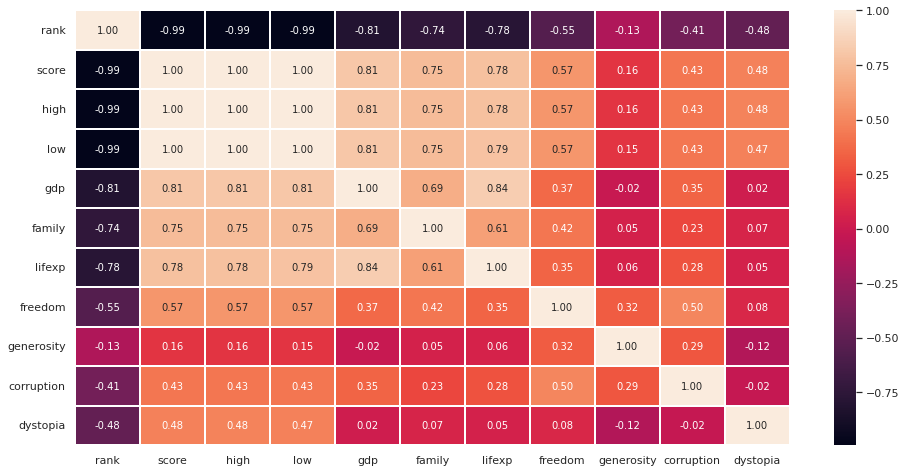

In [ ]:
fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(X1.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

In [ ]:
# Dividimos la muestra de datos en un set de entrenamiento y otro de test (prueba), esta vez será 70 - 30
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(108, 7)
(47, 7)
(108, 1)
(47, 1)


## Regresión Ridge

In [ ]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=1) ## Entre más alto sea el valor alfa, más restringue a los coeficientes
rr.fit(X_train,Y_train)
Y_pred_train = rr.predict(X_train)
Y_pred = rr.predict(X_test) 


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test,Y_pred)
print('Mean Squared Error: ',mse)
rsq = r2_score(Y_train,Y_pred_train)
print('R-square, Training: ',rsq)
rsq = r2_score(Y_test,Y_pred)
print('R-square, Testing: ',rsq)

Mean Squared Error:  0.00548931191562887
R-square, Training:  0.9955774751131087
R-square, Testing:  0.9951673036974555


In [ ]:
print('Intercepto: ',rr.intercept_) # This gives us the intercept term
print("="*32)
print('Coefficientes: \n',rr.coef_)

Intercepto:  [0.27584916]
Coefficientes: 
 [[1.09399331 0.94796222 0.83893715 0.87660181 0.62852485 0.77037563
  0.96472478]]


## Regresión Lasso

In [ ]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.02) ## Entre más alto sea el valor alfa, más restringue a los coeficientes
ls.fit(X_train,Y_train)
Y_pred_train = ls.predict(X_train) 
Y_pred = ls.predict(X_test) 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test,Y_pred)
print('Mean Squared Error: ',mse)
rsq = r2_score(Y_train,Y_pred_train)
print('R-square, Training: ',rsq)
rsq = r2_score(Y_test,Y_pred)
print('R-square, Testing: ',rsq)

Mean Squared Error:  0.006188011869994136
R-square, Training:  0.9950067525284217
R-square, Testing:  0.9945521802105873


In [ ]:
print('Intercepto: ',ls.intercept_)
print("="*32)
print('Coeficientes: \n',ls.coef_)

Intercepto:  [0.68224232]
Coeficientes: 
 [1.35707619 0.86960746 0.40309177 0.72444128 0.         0.33272231
 0.91918698]


## Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=0.02,l1_ratio=0.01) # Entre más alto sea el valor alfa, más restringue a los coeficientes
en.fit(X_train,Y_train)
Y_pred_train = en.predict(X_train) #predicciones para nuestro set de entrenamiento 
Y_pred = en.predict(X_test) #predicciones para nuestro set de prueba o testing 

In [ ]:
##Obtenemos el error cuadrático medio y el R-cuadrado para los datos de entrenamiento y prueba
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_train,Y_pred_train)
print('Mean Squared Error, training:',mse)
mse = mean_squared_error(Y_test,Y_pred)
print('Mean Squared Error: ',mse)
rsq = r2_score(Y_train,Y_pred_train)
print('R-square, Training: ',rsq)
rsq = r2_score(Y_test,Y_pred)
print('R-square, Testing: ',rsq)

Mean Squared Error, training: 0.017790965141102857
Mean Squared Error:  0.016301310489955156
R-square, Training:  0.9866004464830556
R-square, Testing:  0.9856486051180406


In [ ]:
##Obtenemos el error cuadrático medio y el R-cuadrado para los datos de entrenamiento y prueba
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test,Y_pred)
print('Mean Squared Error: ',mse)
rsq = r2_score(Y_train,Y_pred_train)
print('R-square, Training: ',rsq)
rsq = r2_score(Y_test,Y_pred)
print('R-square, Testing: ',rsq)

Mean Squared Error:  0.006188011869994136
R-square, Training:  0.9950067525284217
R-square, Testing:  0.9945521802105873


In [ ]:
print('Intercepto: ',en.intercept_) # Obtenemos el intercepto
print("="*32)
print('Coeficientes: \n',en.coef_) # nuestros coeficientes

Intercepto:  [0.53206124]
Coeficientes: 
 [1.12034622 0.8975645  0.76115849 0.74530606 0.47594747 0.59949965
 0.9295398 ]


## Haremos un modelo comparativo de nuestras tres regresiones

In [ ]:
modelLinear = LinearRegression().fit(X_train, Y_train)
y_predict_linear =  modelLinear.predict(X_test)

In [ ]:
modelLasso = Lasso(alpha=0.02).fit(X_train, Y_train)
y_predict_lasso = modelLasso.predict(X_test)

In [ ]:
modelRidge = Ridge(alpha=1).fit(X_train, Y_train)
y_predict_ridge = modelRidge.predict(X_test)

In [ ]:
## Funcion de perdida de cada modelo de regresion utilizado
from sklearn.metrics import mean_squared_error

linear_loss = mean_squared_error(Y_test, y_predict_linear)
print("Perdida en regresion Lineal:", linear_loss)

lasso_loss = mean_squared_error(Y_test, y_predict_lasso)
print("Perdida en regresion Lasso: ", lasso_loss)

ridge_loss = mean_squared_error(Y_test, y_predict_ridge)
print("Perdida en regresion Ridge: ", ridge_loss)

Perdida en regresion Lineal: 8.820478978517916e-08
Perdida en regresion Lasso:  0.04163370234149273
Perdida en regresion Ridge:  0.00548931191562887


In [ ]:
from sklearn.linear_model import RidgeCV
modelo = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )

_ = modelo.fit(X = X_train, y = Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, Y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

NameError: ignored

In [ ]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

NameError: ignored

In [ ]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 3.33129478793467e-06


In [ ]:
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([3.49468762, 6.63539086, 5.96308773, 6.09760398, 3.79384255,
       4.29066721, 7.52185011, 4.9619358 , 6.07147743, 5.39519427])

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_ridge = mean_squared_error(
                y_true  = Y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 0.00029699307130438303


In [ ]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridge_cv.fit(X_train, Y_train)

Se han truncado las últimas 5000 líneas del flujo de salida.
Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to s

RidgeCV(alphas=array([1.75276425, 1.75459165, 0.63655757, 3.85759421, 6.18839147,
       0.79924611, 2.61588338, 7.14883063, 6.01601605, 3.02172649,
       7.99877005, 6.90556559, 0.01626875, 0.78072499, 6.21693256,
       9.67695176, 2.36880004, 0.10655627, 2.17753403, 2.98948729,
       5.54574029, 8.60239441, 8.16680006, 2.46294578, 1.04182717,
       0.90050754, 2.73551134, 8.29114693, 8.57341652, 5.92735007,
       7.16459056, 7.41883049, 2.48232514, 2.93028049, 6.92118767,
       4.05838826, 3.1453157 , 6.97270117, 6.65760971, 7.46771742,
       1.29485518, 1.33690491, 1.78590556, 9.73448977, 7.5039997 ,
       1.0620961 , 0.37054481, 5.06314653, 4.28731164, 3.70690827]),
        cv=10, normalize=True)

In [ ]:
alpha = ridge_cv.alpha_
alpha

0.01626875205345102

In [ ]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, Y_train)

Ridge(alpha=0.01626875205345102)

In [ ]:
ridge.score(X_train, Y_train)

0.9999975714903594

In [ ]:
ridge.score(X_test, Y_test)

0.999997272286955

In [ ]:
print(adj_r2(X_train, y_train, ridge))

NameError: ignored

In [ ]:
print(adj_r2(X_test, y_test, ridge))

NameError: ignored